In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

# Load small dataset

In [47]:
path = "small Dataset"

# Image Visualization

In [48]:
classes = sorted(os.listdir(path))
print(f"Number of classes: {len(classes)}")
print(f"Class names: {classes}")

Number of classes: 26
Class names: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


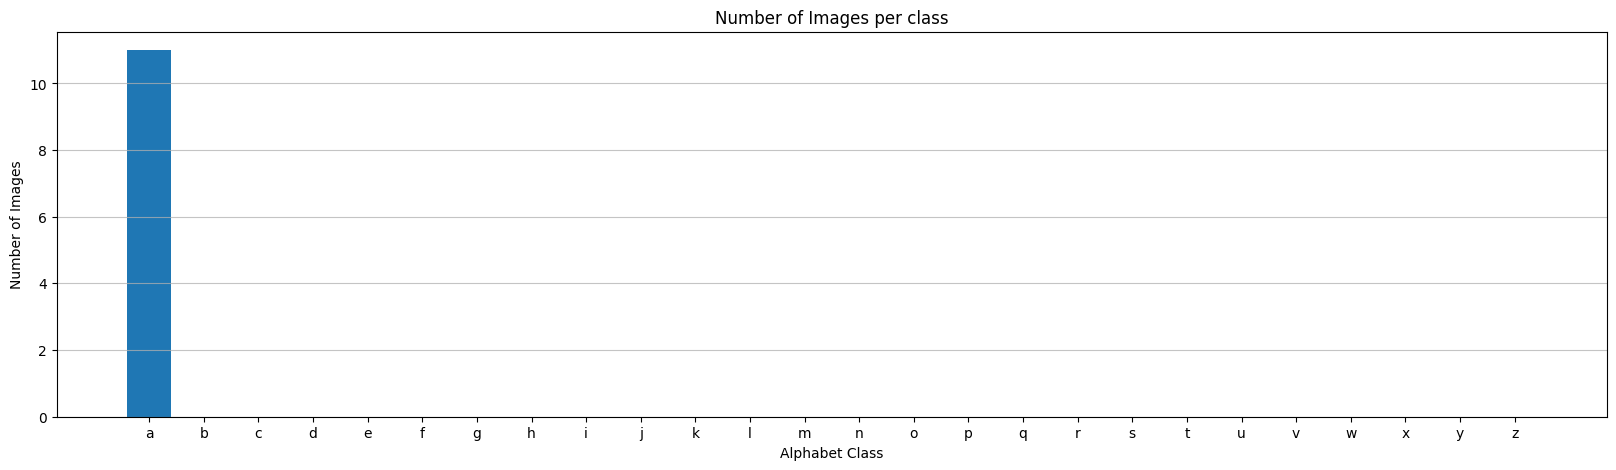

In [49]:
total_images = 0
class_count = []

for cls in classes:
    class_path = os.path.join(path, cls)
    count = len(os.listdir(class_path))
    class_count.append(count)
    total_images += count

plt.figure(figsize=(20, 5))
plt.bar(classes, class_count)
plt.title("Number of Images per class")
plt.xlabel("Alphabet Class")
plt.ylabel("Number of Images")
plt.xticks(classes)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [50]:
sample_class = classes[0]
sample_path = os.path.join(path, sample_class)
sample_img = os.path.join(sample_path, os.listdir(sample_path)[0])
img = plt.imread(sample_img)

dimensions = {}
for cls in classes:
    class_path = os.path.join(path, cls)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = plt.imread(img_path)
        dim = img.shape
        dimensions[dim] = dimensions.get(dim, 0) + 1

print("Image dimensions distribution:")
for dim, count in dimensions.items():
    print(f"{dim}: {count} images")

Image dimensions distribution:
(64, 64, 4): 11 images


# Image Preprocessing for small alphabet

In [51]:
from tqdm import tqdm

training_data = []

def create_training_data():
    for category in classes:

        path1 = os.path.join(path,category)
        class_num = classes.index(category)

        for img in tqdm(os.listdir(path1)):
            img_path = os.path.join(path1, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            new_array = cv2.resize(img_array, (28, 28))
            training_data.append([new_array, class_num])

create_training_data()

print(len(training_data))

100%|██████████| 11/11 [00:00<00:00, 4694.96it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

11


In [52]:
import random
random.shuffle(training_data)

In [53]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [54]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203, 255,
        255, 255,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [55]:
X = np.array(X).reshape(-1, 28, 28, 1)
X = X / 255.0
X[100]

IndexError: index 100 is out of bounds for axis 0 with size 11

In [56]:
from tensorflow.keras.utils import to_categorical # type: ignore
y = to_categorical(y, num_classes=26)
y.shape

(11, 26)

In [57]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU # type: ignore

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X, y, epochs=10, validation_split=0.2)

model.summary()

Epoch 1/10


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 3.4804 - val_accuracy: 0.3333 - val_loss: 3.0623
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3750 - loss: 3.0084 - val_accuracy: 1.0000 - val_loss: 2.6315
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 2.5833 - val_accuracy: 1.0000 - val_loss: 2.1946
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 2.1527 - val_accuracy: 1.0000 - val_loss: 1.7457
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 1.7016 - val_accuracy: 1.0000 - val_loss: 1.2785
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 1.2326 - val_accuracy: 1.0000 - val_loss: 0.8159
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.7719 - val_accuracy: 1.0000 - val_loss: 0.4293
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.3910 - val_accuracy: 1.0000 - val_loss: 0.1819
Epoch 9/1

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,352 (1.32 MB)

 Trainable params: 115,450 (450.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230,902 (901.96 KB)

In [59]:
model.save("small Alphabet_Recognition_Model.keras")

In [60]:
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(img_array, (28, 28))
    normalized = resized / 255.0
    reshaped = normalized.reshape(-1, 28, 28, 1)
    return reshaped

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


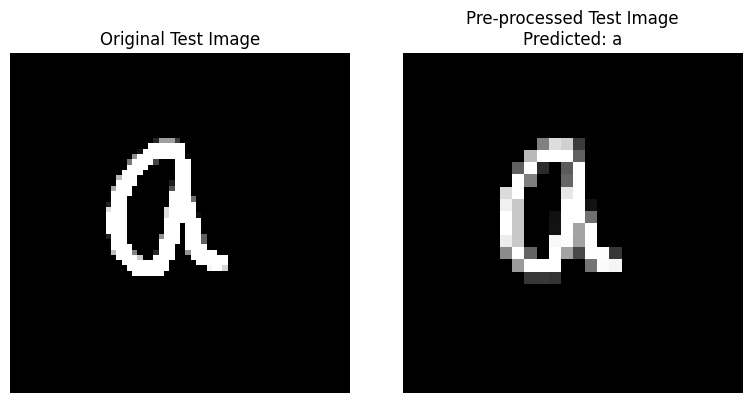

In [61]:
original_img = cv2.imread(r"D:\alphabet recognition\small Test Dataset\a\0_001.png", cv2.IMREAD_COLOR_RGB)
image = prepare_image(r"D:\alphabet recognition\small Test Dataset\a\0_001.png")
model = tf.keras.models.load_model(r'D:\alphabet recognition\small Alphabet_Recognition_Model.keras')

prediction = model.predict(image)
predicted_index = np.argmax(prediction)
predicted_label = classes[predicted_index]

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_img, cmap='gray')
axes[0].set_title("Original Test Image")
axes[0].axis('off')

axes[1].imshow(image[0].reshape(28, 28), cmap='gray')
axes[1].set_title(f"Pre-processed Test Image\nPredicted: {predicted_label}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# === Step 1: Load test images and labels ===
test_dir = r'D:\alphabet recognition\Test Dataset'
X_test, y_test, image_paths = [], [], []
class_names = sorted(os.listdir(test_dir))

for label in class_names:
    class_path = os.path.join(test_dir, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = prepare_image(img_path)
        X_test.append(img)
        y_test.append((label))
        image_paths.append(img_path)

X_test = np.array(X_test).reshape(-1, 28, 28, 1)
y_test = np.array(y_test)

# === Step 2: Make predictions ===
y_pred_probs = model.predict(X_test)
y_pred_indices = np.argmax(y_pred_probs, axis=1)
y_pred = [classes[idx] for idx in y_pred_indices]

# === Step 3: Classification metrics ===
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# === Step 4: Confusion Matrix ===
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# === Step 5: Show incorrect predictions ===
incorrect_indices = np.where(y_pred != y_test)[0]

print(f"\nTotal incorrect predictions: {len(incorrect_indices)}")

# Show a few incorrect samples
num_to_display = min(10, len(incorrect_indices))
plt.figure(figsize=(23, 13))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    img = cv2.imread(image_paths[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, num_to_display, i+1)
    plt.imshow(img)
    plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Examples of Incorrect Predictions', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:


ValueError: Number of classes, 27, does not match size of target_names, 26. Try specifying the labels parameter